In [1]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
import thinkplot
import thinkstats2

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (20,10)

<h1>Assignment 2: Life Expectancy and You!</h1>

<b>Instructions:</b>
<ul>
<li>Use the worksheet below to act as a guide to exploring and examining the data in the dataset.
<li>Try to make things easy to read. Look at the formatting stuff above. 
<li>As long as you do what is asked, you can do things in many different ways. You may need to do a little searching. 
</ul>

### Please Use Formatting to Make it Clear What I Should be Looking at! Please!!! I Beg You!!!

In [2]:
#Load data and do some cleanup before starting
#Please don't change this stuff. 
dfLE = pd.read_csv("led.csv")
dfLE.rename(columns={"Status":"isDeveloped", }, inplace=True)
dfLE["isDeveloped"].replace(('Developed', 'Developing'), (1, 0), inplace=True)
dfLE = dfLE.drop(columns={"Year", "Incomecompositionofresources", "thinness5-9years", "HIV/AIDS", "percentageexpenditure", "Totalexpenditure", "thinness1-19years"})
dfLE = dfLE.groupby("Country", as_index=False).mean()
dfLE.head(15)


,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling
0,Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.3750,52.3125,340.015425,9.972260e+06,8.21250
1,Albania,0.0,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.1250,98.0625,2119.726679,6.969116e+05,12.13750
2,Algeria,0.0,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.7500,91.8750,2847.853392,2.164983e+07,12.71250
3,Angola,0.0,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.1250,47.6875,1975.143045,1.014710e+07,8.04375
4,AntiguaandBarbuda,0.0,75.05625,127.5000,0.0000,7.949333,98.266667,0.0000,38.42500,0.0000,96.9375,98.3125,9759.305728,NaN,8.84375
5,Argentina,0.0,75.15625,106.0000,10.1250,7.966667,81.285714,2.0000,54.98125,11.3750,93.3750,92.3750,6998.575103,2.012120e+07,16.50625
6,Armenia,0.0,73.40000,117.3750,1.0000,3.702667,87.562500,274.2500,44.70625,1.0000,89.1250,87.3750,1999.986318,1.015165e+06,11.78750
7,Australia,1.0,81.81250,63.1875,1.0000,10.155333,93.400000,103.9375,55.86250,1.3750,86.7500,86.8750,34637.565047,4.587010e+06,20.03750
8,Austria,1.0,81.48125,65.7500,0.0000,12.236000,81.062500,77.2500,48.28750,0.0000,86.0000,86.7500,33827.476309,6.474880e+06,15.38750
9,Azerbaijan,0.0,70.73125,115.1875,6.0625,0.992000,59.214286,598.1875,43.84375,7.1875,75.8125,82.3125,3302.947807,2.157370e+06,11.35000


<h2>Part 1: Add a column for GDP per Capita (5pts)</h2>

Show print the labels along with just that column. Print 10 random rows of that data. 

Note: you'll have to look at the units to ensure you get it right. 

In [3]:

dfLE["GDP/Capita"] = (dfLE["GDP"]/dfLE["Population"])
dfLE.dropna(inplace=True)

dfLE[["Country","GDP/Capita"]].sample(10)



,Country,GDP/Capita
53,ElSalvador,0.000859
98,Luxembourg,0.200760
111,Montenegro,0.014186
80,Ireland,0.009399
92,Latvia,0.006770
54,EquatorialGuinea,0.014193
122,Nigeria,0.000019
157,SouthAfrica,0.000167
81,Israel,0.676903
104,Malta,0.045006


### Part 2: Print a visualization of each distribution. Both regular (density) and cumulative. (15pts)

Print each distribution is some type of visualization, also print the cumulative distribution. 
<ul>
<li>5 points are for using some visualization that is effective.
<li>5 points for formatting things in a nice layout. Hint: for whatever chart you use, look into some formatting options. Think of what to try to Google for an example for printing multiple charts, a grid of charts, etc... and try to adapt one to yours. There is also a way to do it using some thinkstats/thinkplot stuff. 
<li><b>5 points are for doing it in an efficient way - just listing off each column is lots of typing... Remember, the #1 trait of programmers is laziness with respect to repetitive tasks. If we are doing the same thing over and over with tiny changes, try to think of a condensed way to do this...</b>
</ul>

Regular (density) distribution

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

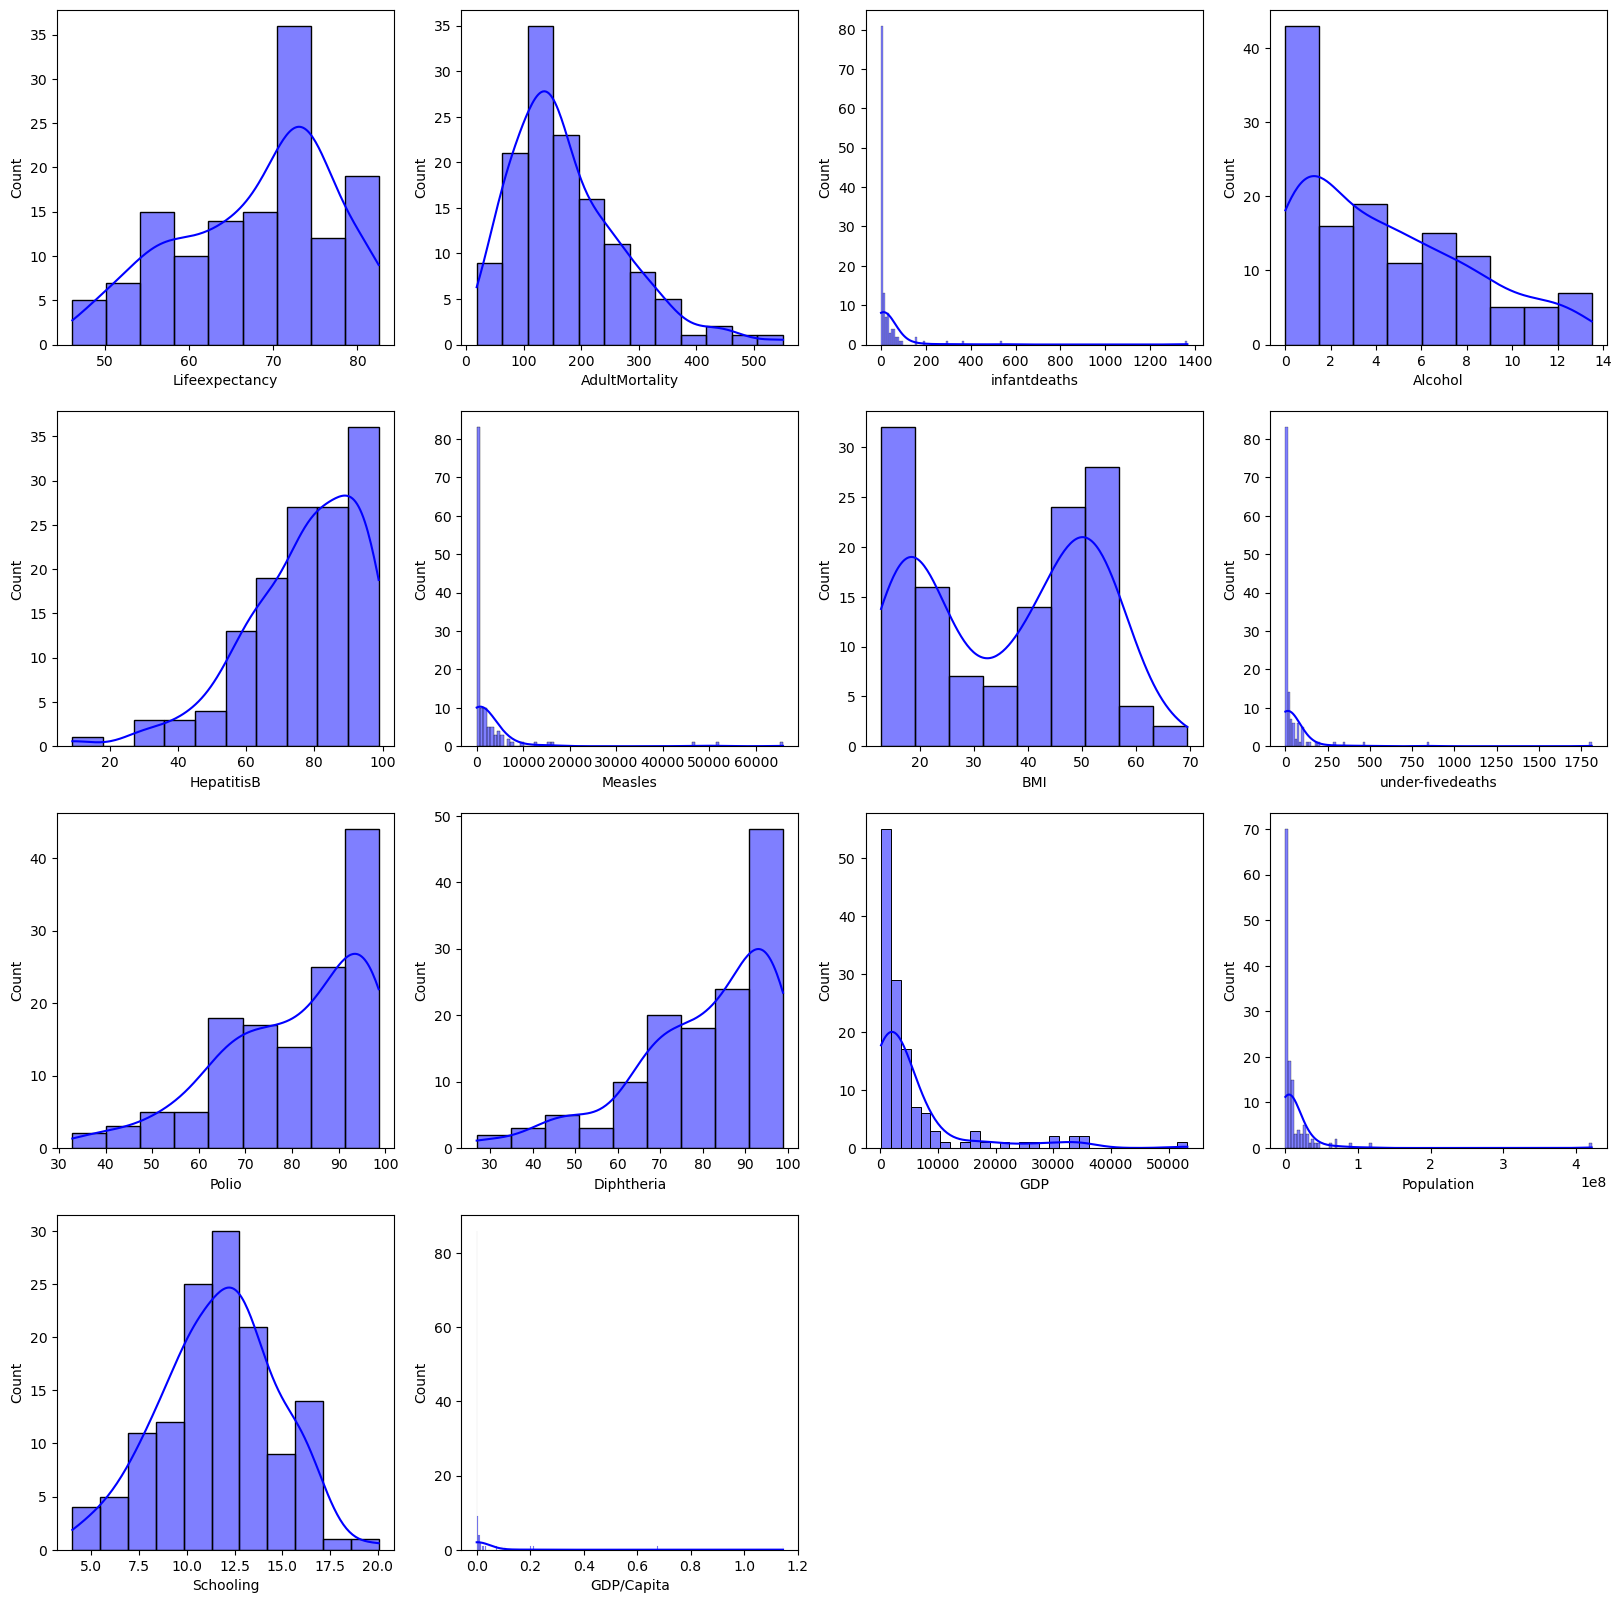

In [95]:
df = dfLE.drop(columns=["Country","isDeveloped"])
j=1
plt.figure(figsize=(20,20))
for i in df.columns:
    plt.subplot(4,4,j)
    sns.histplot(df[i],color="blue", kde = True)
    #sns.ecdfplot(data=df[i], color="red")
    
    j=j+1
plt.tight_layout

Cumulative distribution

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

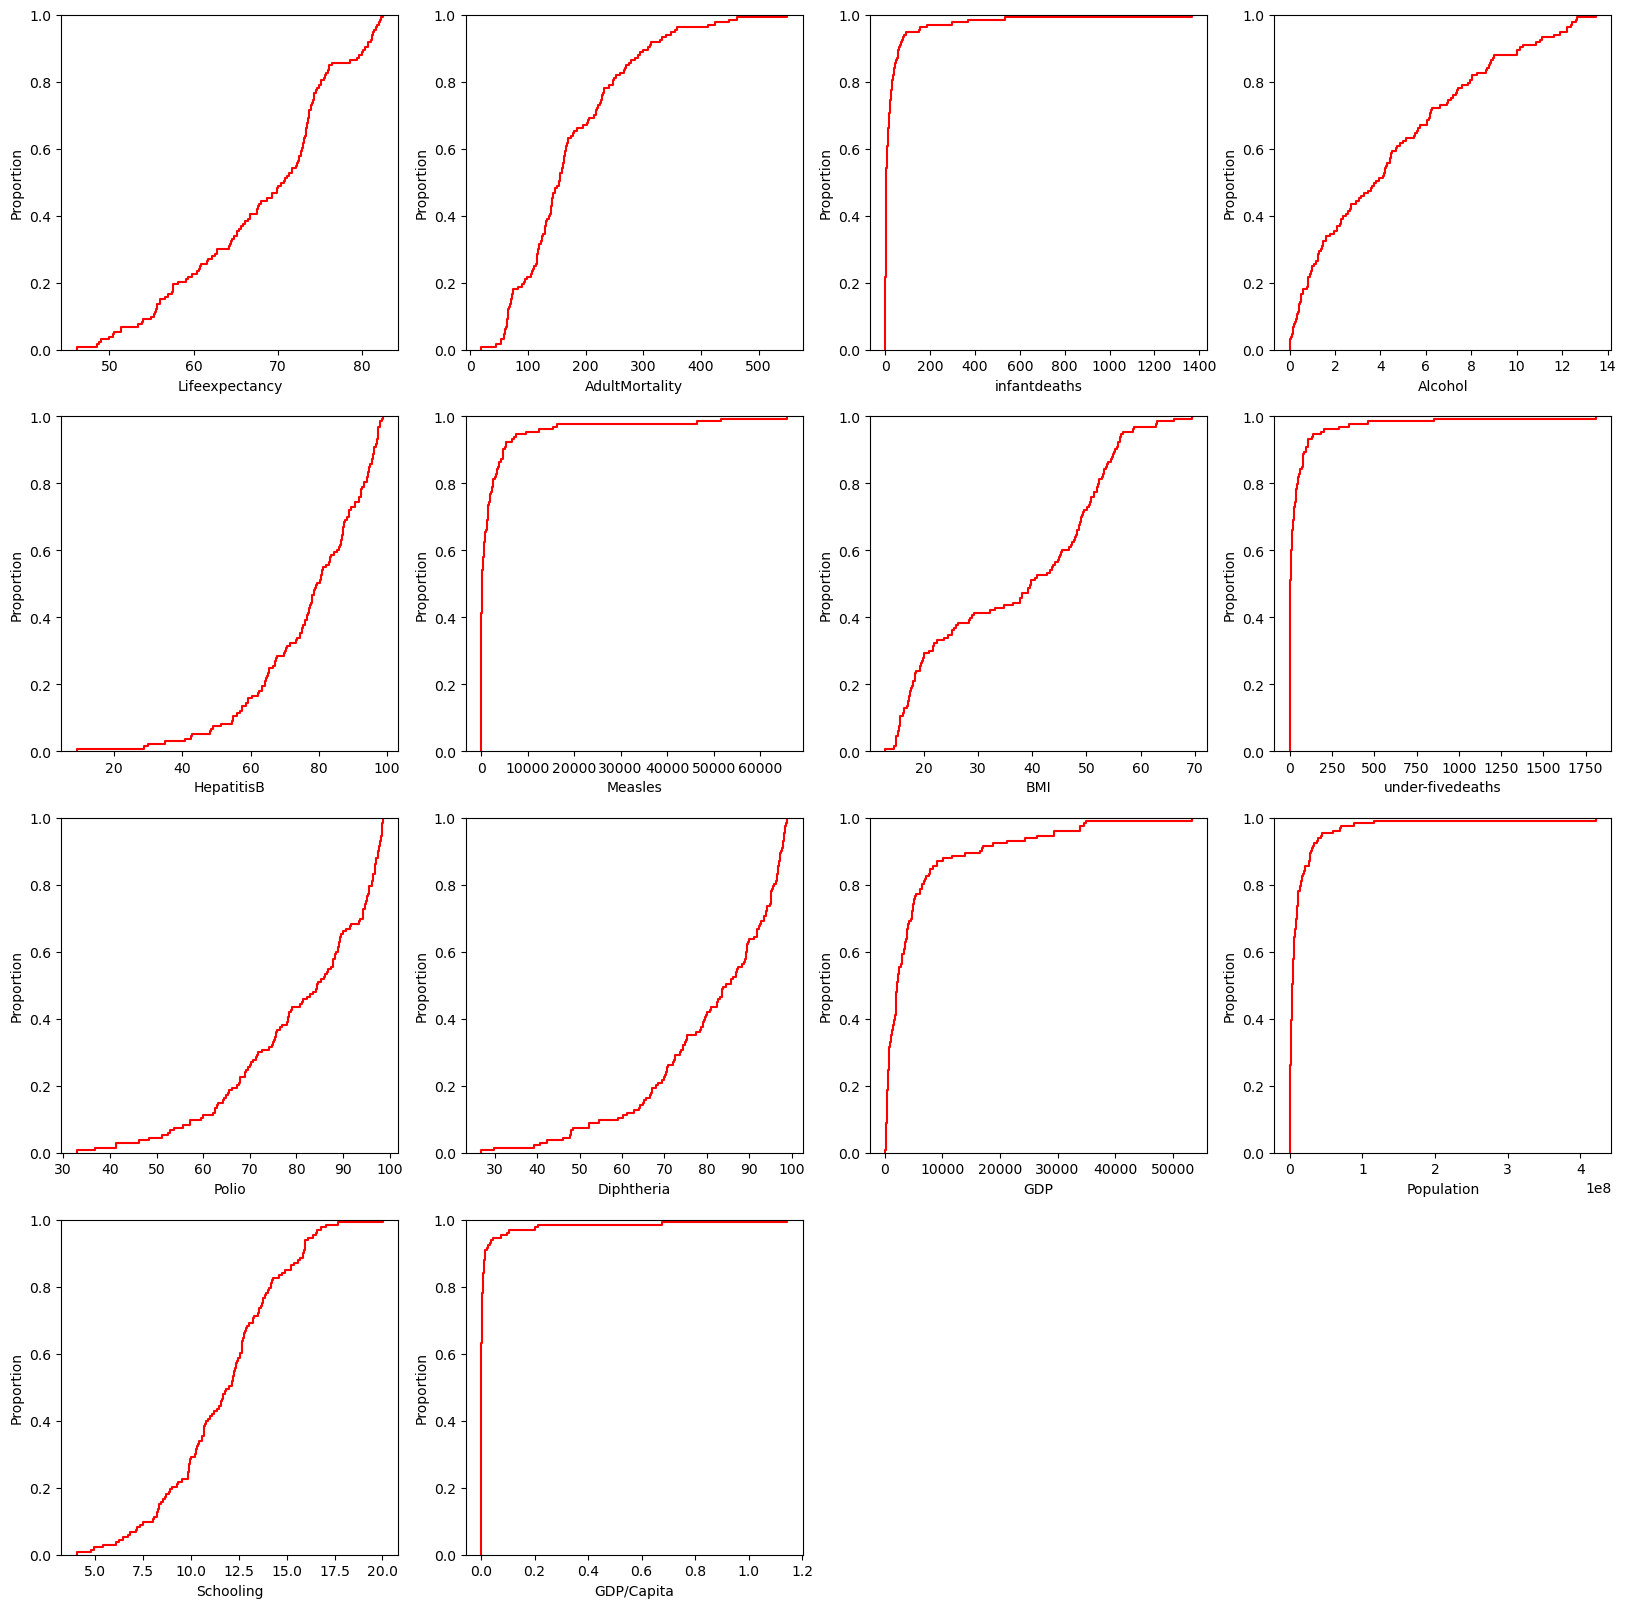

In [96]:
df = dfLE.drop(columns=["Country","isDeveloped"])
j=1
plt.figure(figsize=(20,20))
for i in df.columns:
    plt.subplot(4,4,j)
    sns.ecdfplot(data=df[i], color="red")
    
    j=j+1
plt.tight_layout

### Create an analytical distribution for SCHOOLING, and use it for a couple of things. (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing the distribution. Do it <b>without</b> using a fit() method. Plot the emperical data on the same graph as the analytical distribution. 
<li>5 points are for using the distribution to predict the percentage of that have a schooling level within 1 year of Canada. 
</ul>

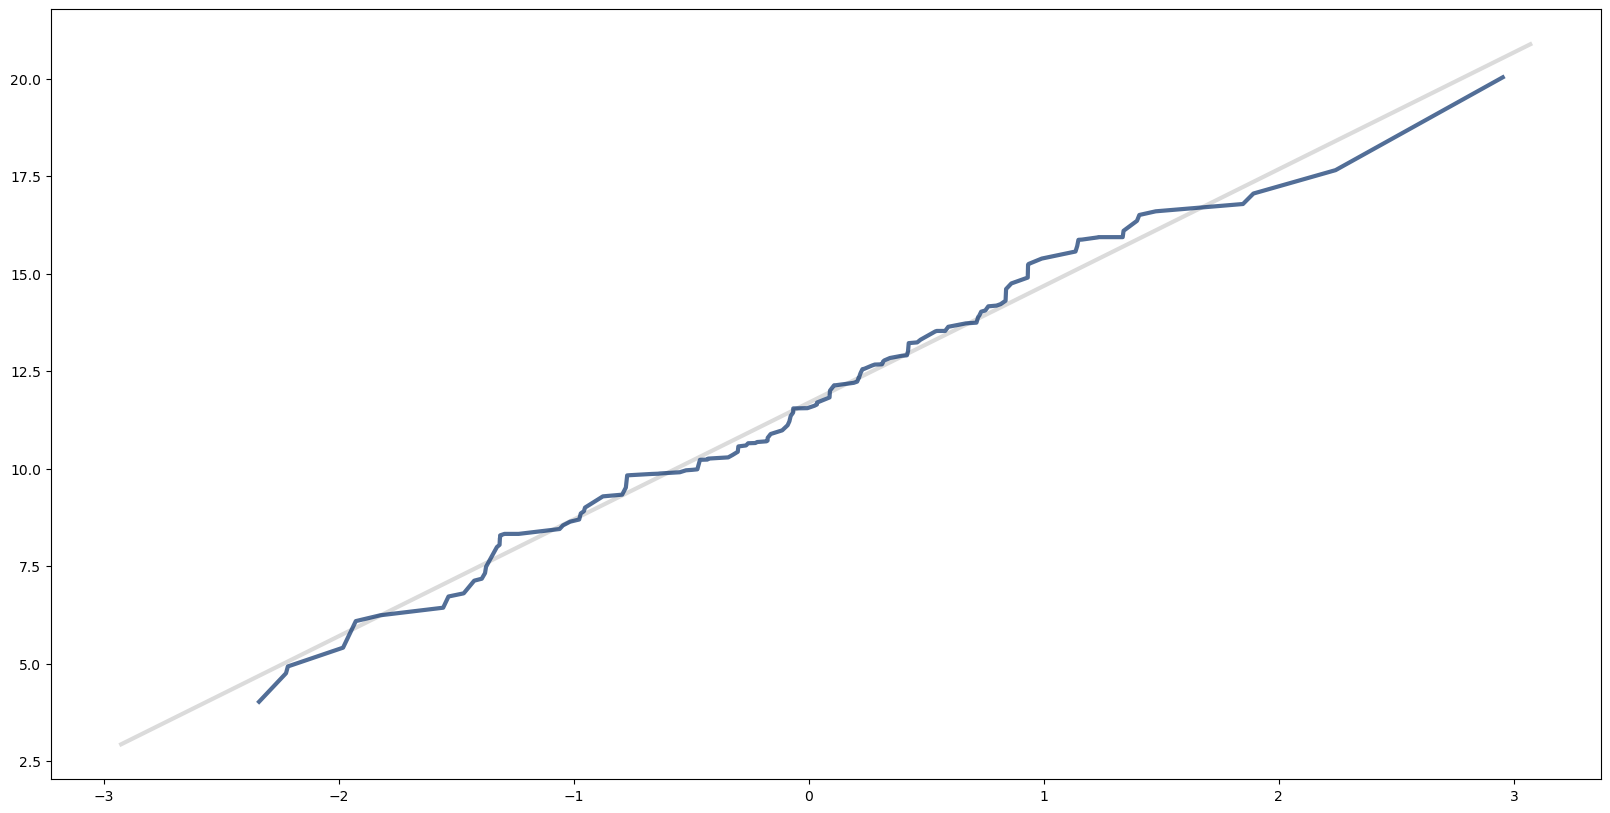

In [97]:
# Plotting normal distribution
thinkstats2.NormalProbabilityPlot(dfLE["Schooling"])

From above graph schooling data looks like normally distributed.
Let's check it using null hypothesis

In [98]:
import scipy.stats
k2, p = scipy.stats.normaltest(dfLE["Schooling"])
p

0.8061408621435778

Schooling data is normally distributed based on our null hypothesis.

In [99]:
#Analytical for Schooling

school_mu = dfLE["Schooling"].mean()
school_sigma = dfLE["Schooling"].std()
school_normz = ss.norm(school_mu,school_sigma)

<AxesSubplot:xlabel='Schooling', ylabel='Density'>

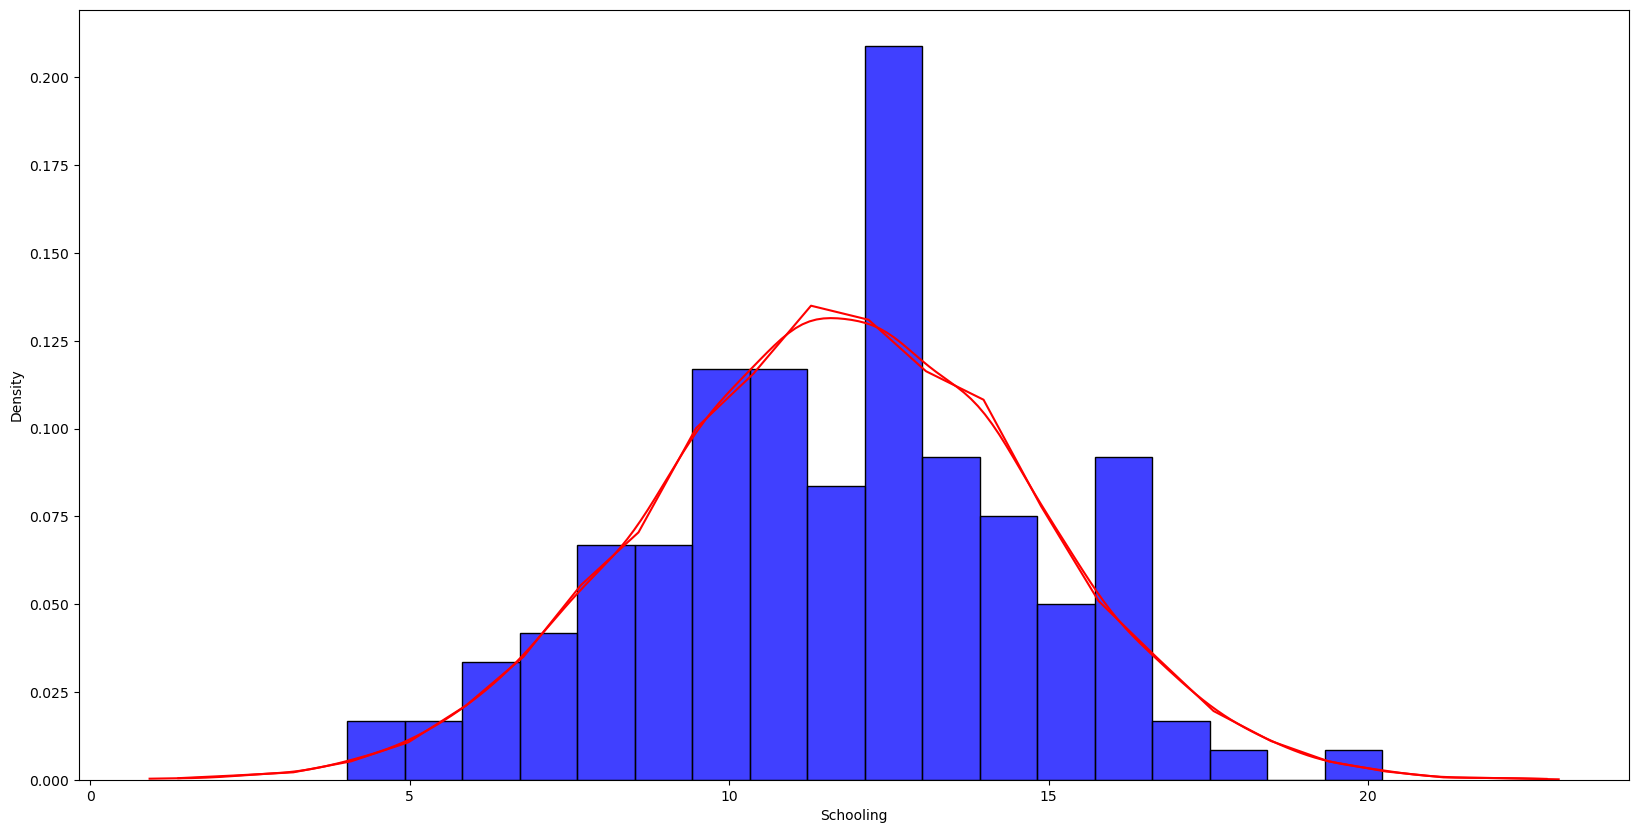

In [100]:
# analytical (Red) and Empirical(Blue) distribution for schooling
plt.clf()
sns.histplot(data=school_normz.rvs(10000), binwidth=0.9, color="red", stat="density", kde=True, element="poly", fill=False)
sns.histplot(data=round(dfLE["Schooling"],4), binwidth=0.9, color="blue", stat="density")

Percentage of that have a schooling level within 1 year of Canada. 

In [101]:
dfc= dfLE[dfLE["Country"]=="Canada"]


### Part 3: Create another analytical distribution for GDP per Capita (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing it alongside the emperical. You have free reign on how. 
<li>5 points are for using the analytical distribution to evaluate the quality of your GDP per capita metric - does it appear accurate? Why or why not?
<li>If you've judged GDP per cap to be unreliable, drop it. 
</ul>

<AxesSubplot:xlabel='GDP/Capita', ylabel='Proportion'>

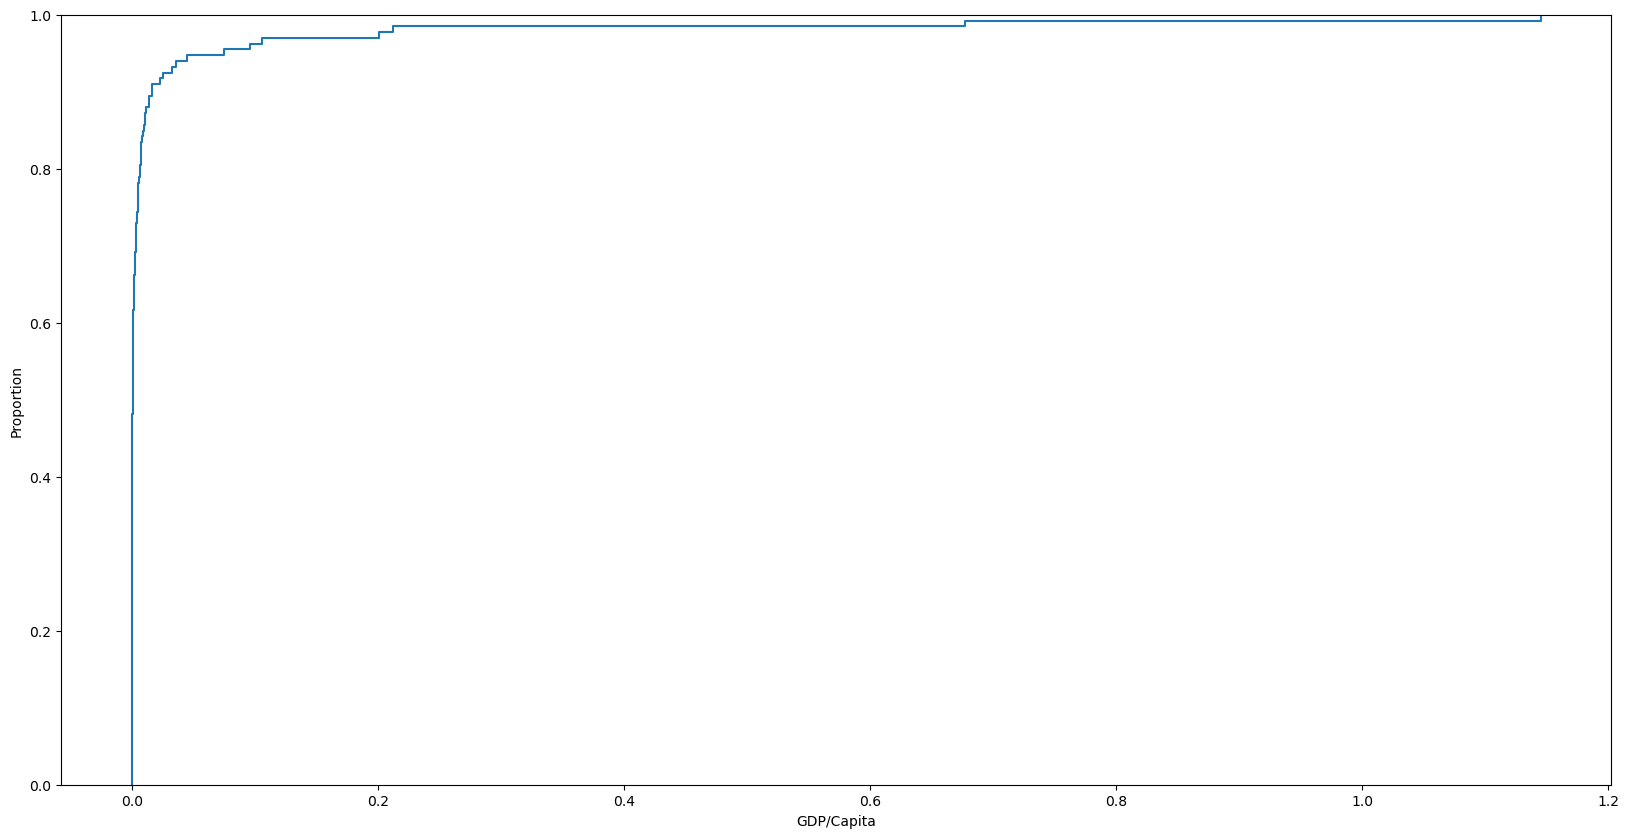

In [102]:
#CDF for GDP/capita to analyze  type of distribution
sns.ecdfplot(data=dfLE["GDP/Capita"])

THE above graph looks like exponential distribution.

Plotting Analytical(exponen) (blue) and empirical(red) distribution

<AxesSubplot:xlabel='GDP/Capita', ylabel='Proportion'>

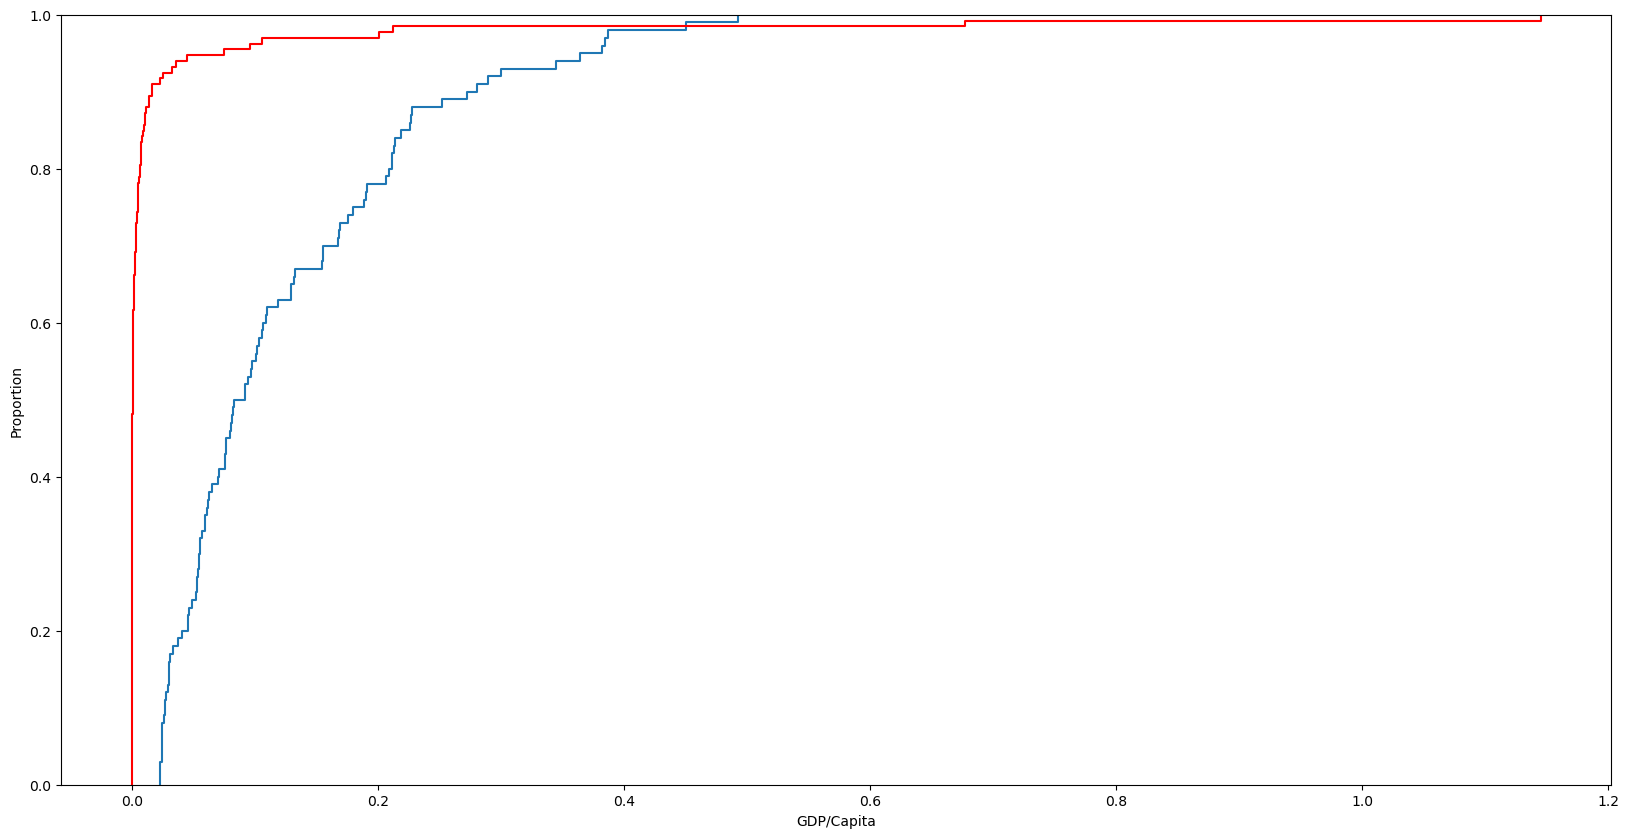

In [103]:
sns.ecdfplot(data=scipy.stats.expon.rvs(size=100, scale=np.std(dfLE["GDP/Capita"]), loc=np.mean(dfLE["GDP/Capita"])))
sns.ecdfplot(data=dfLE["GDP/Capita"], color="red")


Using the analytical distribution to evaluate the quality of your GDP per capita metric - does it appear accurate? Why or why not?

### Part 4: Visually identify correlations. Separate developed and not developed countries is some way. (15pts)

<ul>
<li>5 points are for effectively and clearly showing the visualizations used to evaluate correlations.
<li>10 points are for, in the process of visualizing, remove outliers that confound correlations. List outlier "filters" you used and justify why - was the data an error, a real value that is just way out of line, or somethingn else? Remember, you're trying to find things that have correlations with each other. Looking at a correlation between home size and income may not benefit from Jeff Bezos being included. It may be helpful to look at the results and revise. 
</ul>

Filtering Outliers

Filtered GDP above 40000 which is very much higher than mean and median.
Filtered measles above 10000.
Filtered Infant deaths and under-five deaths above 200 which is hiher than the normal values.
Removed Nan values and dropped Country column

In [111]:
dfLE= dfLE[dfLE["GDP"]<30000]
dfLE=dfLE[dfLE["Measles"]<10000]
dfLE=dfLE[dfLE["infantdeaths"]<200]
dfLE=dfLE[dfLE["under-fivedeaths"]<200]


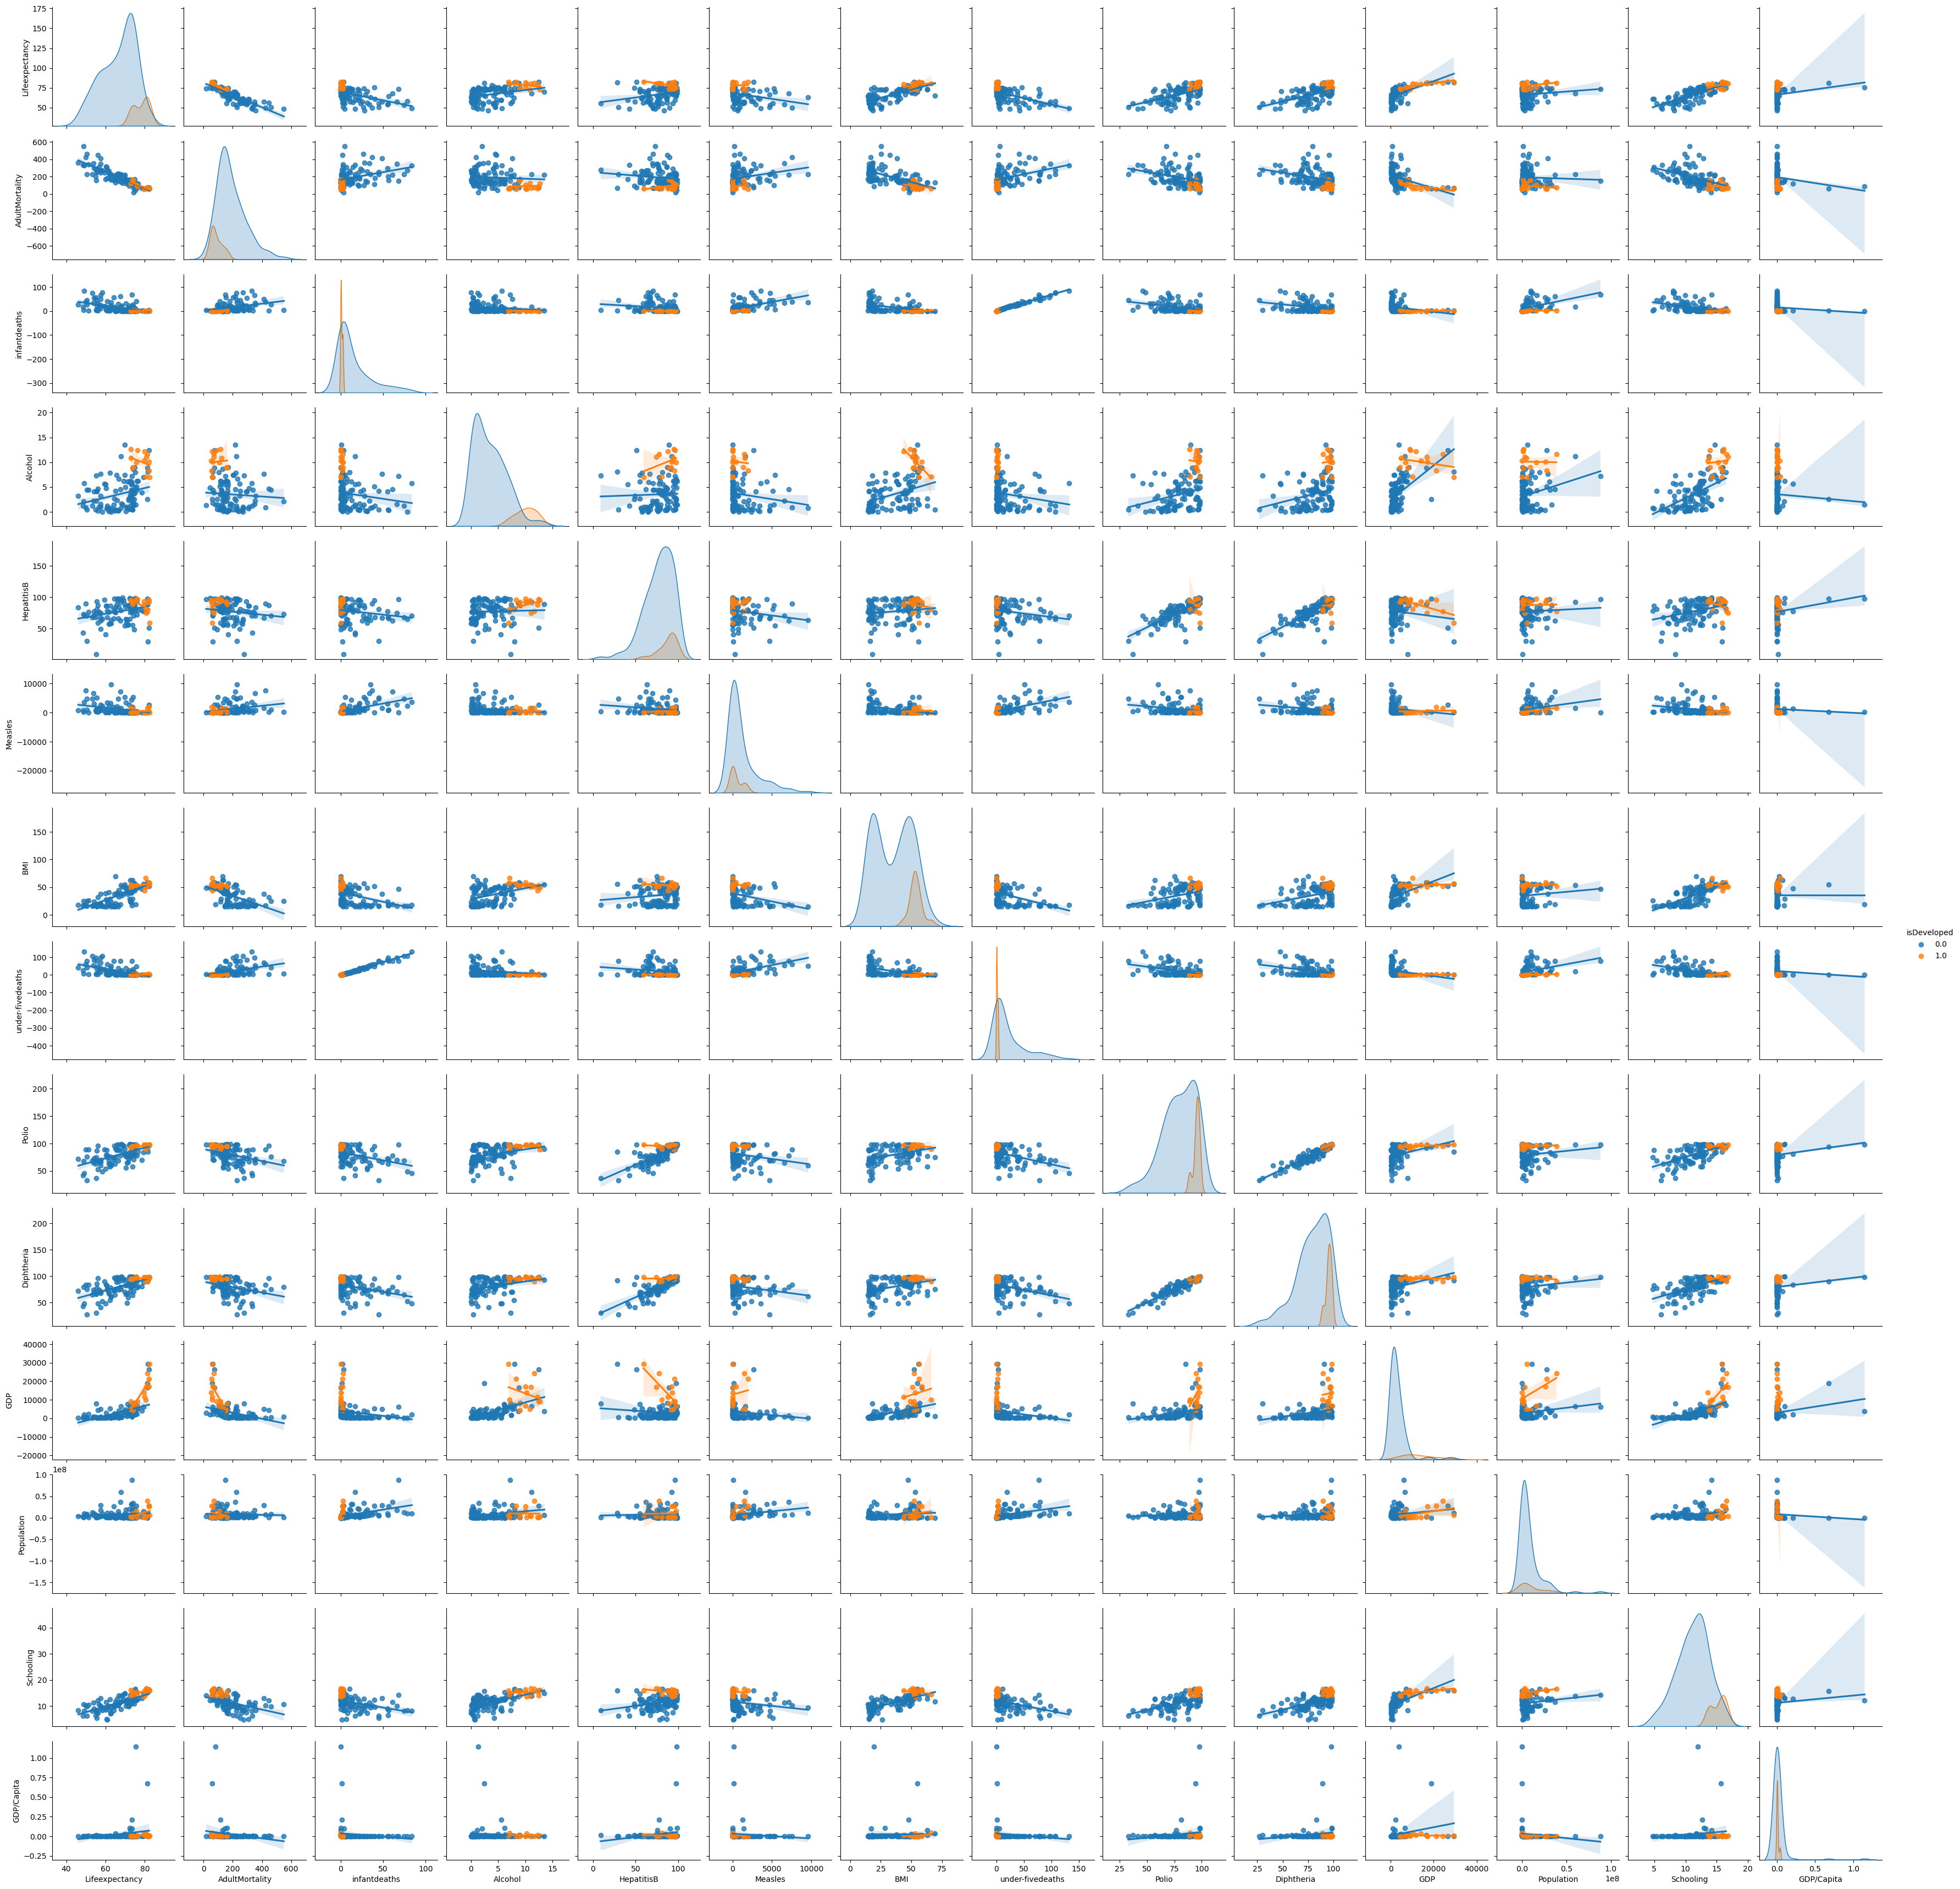

In [112]:
#Visualize correlations. 
df_cor = dfLE.drop(columns=["Country"])
sns.pairplot(df_cor, dropna= True,hue="isDeveloped", kind='reg')
plt.show()

### Part 5: Calculate correlations (25pts)

<ul>
<li>5 points are for identifying and calculating 3 strongest correlations with life expectancy for each of developed and not developed. 
<li>10 points are for analyzing those correlations. Do they appear to be supported by reality? Do you have reason to beleive any are causal?
<li>10 points are for identifying 2 places where developing and developed countries have a substantially different relationship with respect to life expectancy, and theorizing why. What would be needed to confirm your thoughts?
</ul>

<b>Please put your written parts in markdown cells, with a little formatting to make them readable. 

Heatmap and Correlation of developed countries

In [114]:
#Calculate correlations and analyze. 
hmap_dev = dfLE.apply(pd.to_numeric, errors='coerce')
hmap_dev=hmap_dev[hmap_dev["isDeveloped"]==1]
hmap_dev = hmap_dev.drop(columns=["Country","isDeveloped"])
hmap_dev = hmap_dev.corr()
hmap_dev.head()

,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,GDP/Capita
Lifeexpectancy,1.000000,-0.890077,0.020132,-0.320862,-0.542086,0.018743,0.306005,0.074536,0.430657,0.040403,0.828770,0.406137,0.440267,0.214921
AdultMortality,-0.890077,1.000000,0.178334,0.067478,0.358550,0.106877,-0.241118,0.133440,-0.288048,-0.057117,-0.682890,-0.224181,-0.271110,-0.369309
infantdeaths,0.020132,0.178334,1.000000,-0.071961,0.246035,0.719741,0.058138,0.986827,0.137403,-0.131166,0.018651,0.784741,0.100732,-0.521167
Alcohol,-0.320862,0.067478,-0.071961,1.000000,0.400350,-0.086396,-0.696853,-0.022836,-0.075469,0.052367,-0.268442,-0.023741,0.110033,-0.277389
HepatitisB,-0.542086,0.358550,0.246035,0.400350,1.000000,0.187424,-0.157736,0.172755,-0.209616,0.044686,-0.696313,0.026338,-0.392112,-0.110599


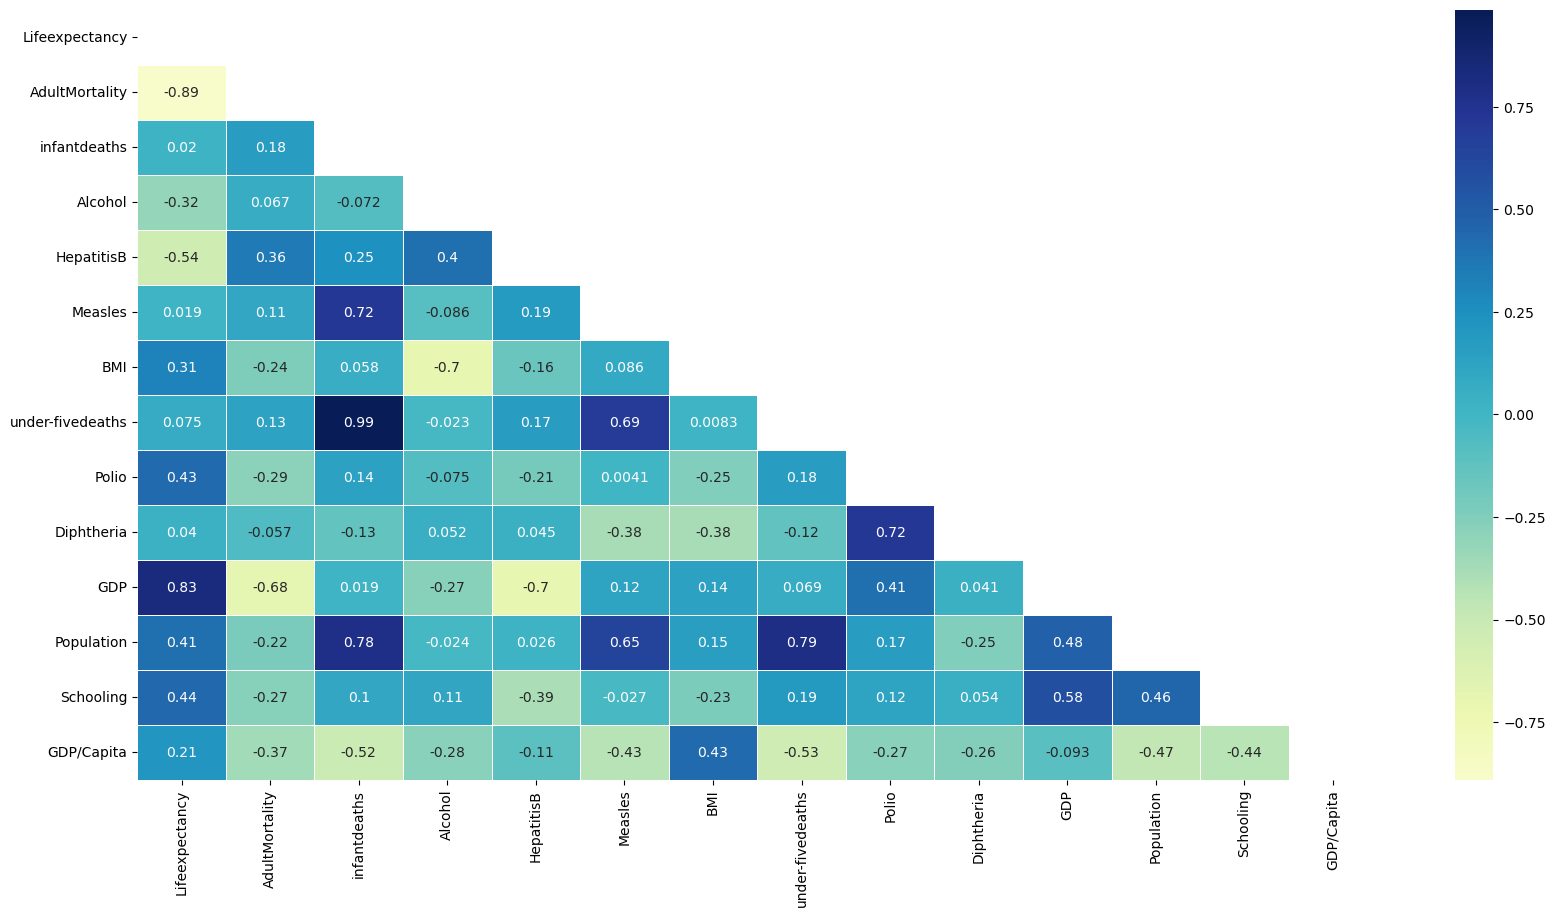

In [115]:
mask = np.triu(np.ones_like(hmap_dev, dtype=bool))
sns.heatmap(hmap_dev, center=0, linewidths=.5, annot=True, cmap="YlGnBu", yticklabels=True, mask=mask)
plt.show()

<ul>
The three strongest correlations of life expectancy for developed countries are:
    <li>GDP: 0.83
    <li>AdultMortality: -0.89
    <li>Hepatitis B: -0.54

Heatmap and Correlation of not developed countries

In [117]:
hmap_ndev = dfLE.apply(pd.to_numeric, errors='coerce')
hmap_ndev=hmap_ndev[hmap_ndev["isDeveloped"]==0]
hmap_ndev = hmap_ndev.drop(columns=["Country","isDeveloped"])
hmap_ndev = hmap_ndev.corr()
hmap_ndev.head()

,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,GDP/Capita
Lifeexpectancy,1.000000,-0.858246,-0.491897,0.284682,0.281421,-0.324451,0.725121,-0.548849,0.556927,0.557499,0.517495,0.125375,0.740513,0.200618
AdultMortality,-0.858246,1.000000,0.362954,-0.067686,-0.139067,0.270767,-0.581200,0.398979,-0.346214,-0.312727,-0.350161,-0.044241,-0.472838,-0.183556
infantdeaths,-0.491897,0.362954,1.000000,-0.175104,-0.171144,0.570445,-0.441002,0.989160,-0.388411,-0.343628,-0.239754,0.490955,-0.419920,-0.133719
Alcohol,0.284682,-0.067686,-0.175104,1.000000,0.036112,-0.166776,0.377138,-0.185697,0.291297,0.284599,0.537405,0.252618,0.541135,-0.062567
HepatitisB,0.281421,-0.139067,-0.171144,0.036112,1.000000,-0.187603,0.141896,-0.195622,0.767472,0.780163,-0.121393,0.054897,0.300910,0.171569


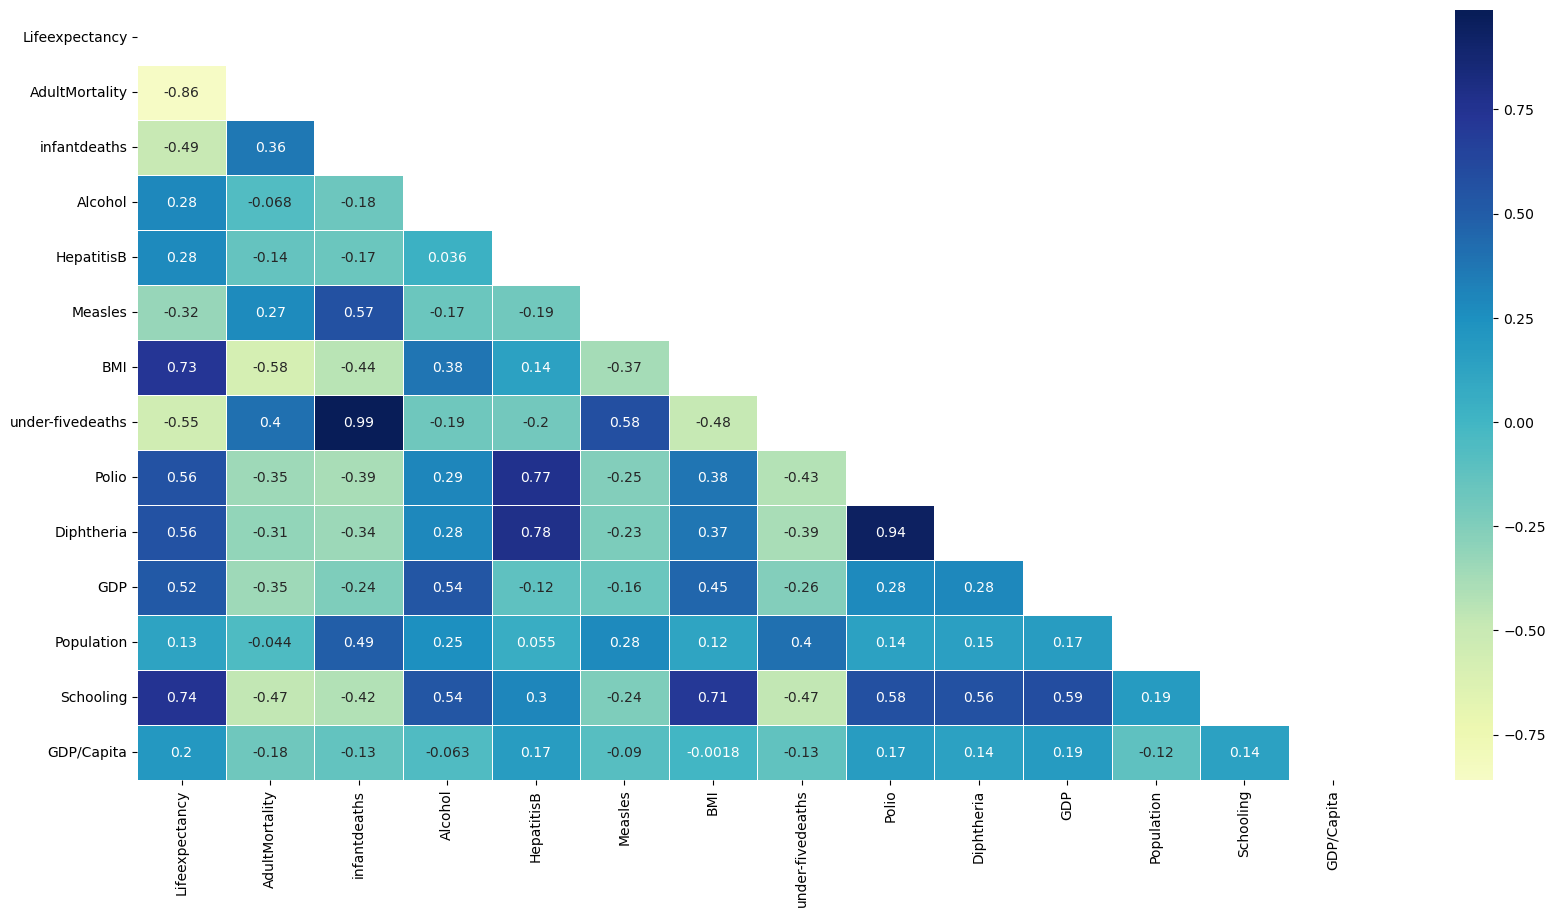

In [118]:
mask = np.triu(np.ones_like(hmap_ndev, dtype=bool))
sns.heatmap(hmap_ndev, center=0, linewidths=.5, annot=True, cmap="YlGnBu", yticklabels=True, mask=mask)
plt.show()


<ul>The three strongest correlations of life expectancy for not developed countries are:
    <li>BMI: 0.73
    <li>AdultMortality: -0.86
    <li>Schooling: 0.74

10 points are for analyzing those correlations. Do they appear to be supported by reality? Do you have reason to beleive any are causal?

10 points are for identifying 2 places where developing and developed countries have a substantially different relationship with respect to life expectancy, and theorizing why. What would be needed to confirm your thoughts?

Alcohol, under five deaths